In [1]:
import os
from scipy.sparse import save_npz, load_npz
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import yaml
import stat
from os import listdir
from os.path import isfile, join
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from utils.io import load_yaml

In [2]:
def find_all_nceplrec(domain, folder_path, meatric):
    csv_files = [join(folder_path, f) for f in listdir(folder_path)
                 if isfile(join(folder_path, f)) and f.endswith('nceplrec.csv')]

    for record in csv_files:
        df = pd.read_csv(record)
        df[meatric+'_Score'] = df[meatric].map(lambda x: literal_eval(x)[0])
        df['domain'] = domain
    return df

In [3]:
dataset = ['movielens20m','netflix','yahoo']
names = ['Movielens', 'Netflix', 'Yahoo']

In [4]:
dfs = []
for i, data in enumerate(dataset):
    dfs.append(find_all_nceplrec(names[i], 'tables/'+data, 'NDCG'))
df = pd.concat(dfs)

In [5]:
df.head()

Unnamed: 0      model  rank  alpha  lambda  iter similarity  corruption  \
0           0  NCE-PLRec    50      1       1    10     Cosine           0   
1           1  NCE-PLRec    50      1       1    10     Cosine           0   
2           2  NCE-PLRec    50      1       1    10     Cosine           0   
3           3  NCE-PLRec    50      1       1    10     Cosine           0   
4           4  NCE-PLRec    50      1       1    10     Cosine           0   

   root  topK    ...           Precision@5      Precision@50  \
0   0.7   NaN    ...      [0.1112, 0.0009]  [0.0735, 0.0004]   
1   0.8   NaN    ...       [0.113, 0.0009]   [0.075, 0.0004]   
2   0.9   NaN    ...       [0.114, 0.0009]  [0.0763, 0.0004]   
3   1.0   NaN    ...      [0.1137, 0.0009]  [0.0778, 0.0004]   
4   1.1   NaN    ...      [0.1114, 0.0009]  [0.0781, 0.0004]   

        R-Precision         Recall@10         Recall@15         Recall@20  \
0  [0.0943, 0.0006]  [0.1046, 0.0009]   [0.1463, 0.001]  [0.1828, 0.0012]   
1  [0.0969, 0.0007]  [0.1091, 0.0009]  [0.1525, 0.0011]  [0.1905, 0.0012]   
2   [0.098, 0.0007]  [0.1105, 0.0009]  [0.1552, 0.0011]  [0.1948, 0.0012]   
3  [0.0971, 0.0007]  [0.1085, 0.0009]  [0.1538, 0.0011]  [0.1952, 0.0013]   
4  [0.0952, 0.0007]  [0.1045, 0.0009]  [0.1489, 0.0011]  [0.1893, 0.0012]   

           Recall@5         Recall@50 NDCG_Score     domain  
0  [0.0571, 0.0006]  [0.3222, 0.0015]     0.1962  Movielens  
1  [0.0594, 0.0006]  [0.3331, 0.0015]     0.2020  Movielens  
2  [0.0601, 0.0007]  [0.3427, 0.0015]     0.2064  Movielens  
3  [0.0591, 0.0007]  [0.3515, 0.0016]     0.2092  Movielens  
4  [0.0566, 0.0006]   [0.353, 0.0016]     0.2079  Movielens  

[5 rows x 24 columns]

In [6]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x='root', y="NDCG_Score", hue='domain', style='domain', markers=True, ci=50, data=df, ax=ax)
plt.xlabel("Beta")
plt.ylabel("NDCG")
plt.tight_layout()

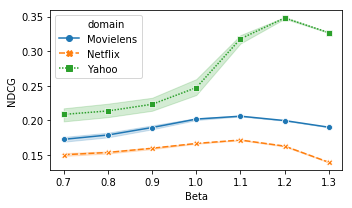

In [7]:
plt.savefig('figs/beta.pdf', format='pdf')
plt.show()

In [8]:
time_df = pd.read_csv('tables/timing.csv')
time_df = time_df.sort_values(by=['Time']).reset_index()
time_df['Time'] = time_df['Time']

In [9]:
time_df

level_0  Unnamed: 0  index     Method          Time
0        0           0      5    PureSVD     64.465046
1        1           1      0      PLRec     97.169447
2        2           2      2    NCE-SVD    378.716946
3        3           3      3  NCE-PLRec    463.964498
4        4           4      9    AutoRec   2693.963599
5        5           5      6       CDAE   3445.830643
6        6           6      8     VAE-CF   3661.221051
7        7           7      1        BPR  14032.845759
8        8           8      4        CML  15209.464049
9        9           9      7       WRMF  31996.982896

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x="Time", y="Method", data=time_df,facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2", ax=ax)

# Define some hatches
hatches = ['\\\\\\']

# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[0])
    
#ax.set_xscale("log")
#ax.set_xlim(0, 1e4)
ax.set_ylabel('Algorithm')
ax.set_xlabel('Time(in seconds)')

# for index, row in time_df.iterrows():
#     text = ax.text(1e4, index+0.15, "{:10.4f}".format(row.Time), color='black', ha="right", va='center')
#     text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='white'),
#                        path_effects.Normal()])
sns.despine()
plt.tight_layout()

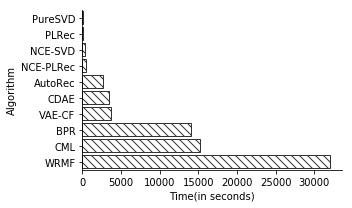

In [11]:
plt.savefig('figs/time.pdf',format='pdf')
plt.show()

In [ ]:
pop_df = pd.read_csv('caches/personalization_at_{0}.csv')

In [ ]:
#pop_df = pop_df[pop_df['model'].isin(['NCE-SVD',' NCE-PLRec'])]

In [ ]:
pop_df.head()

In [ ]:
def pandas_ridge_plot(df, model, pop, k, folder='figures', name='personalization', save=True):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    num_models = len(df.model.unique())


    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(num_models, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row=model, hue=model, aspect=10, height=0.5, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, pop, clip_on=False, shade=True, alpha=1, lw=1.5, bw=1000)
    g.map(sns.kdeplot, pop, clip_on=False, color="w", lw=1.5, bw=1000)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(-0.2, 0.1, label,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, pop)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.8)

    # Remove axes details that don't play well with overlap

    g.set_xlabels("Popularity Distribution of Recommended Items")
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    if save:
        pass
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}.pdf".format(folder, name, fig_path), format="pdf", bbox_inches="tight")
        plt.savefig("{2}/{0}/{1}.png".format(folder, name, fig_path), format="png", bbox_inches="tight")
        plt.show()
    else:
        plt.show()
    plt.close()

In [ ]:
pandas_ridge_plot(pop_df, 'model', 'pop', 'x', folder='analysis/{0}/personalization'.format('test'),
                  name="personalization_at_x".format('x'))